<h1>FOOTBALL STATS PROJECT<h1>
<h3>Mateo Pineda Giraldo<h3>
<h3>May 2025<h3>
<h5>In this project we are going to analyze players perfomance and create a model to predict, in base in their performance, what will be their market price.<h5>

In [1]:
#First Step we are going to import the libraries that we need for the project
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
import requests 
from urllib.request import urlopen

In [2]:
#import our data 

data1= pd.read_csv("Output.csv", sep = ";")
data1.head()

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No


In [3]:
#We continue doing some web scrapping, to obtain some data from differetn web pages that can be useful for this project

url = "https://www.transfermarkt.co/meisteeinsaetze/topscorer/statistik/2024/selectedOptionKey/0/saison_id/2024/altersklasse//ausrichtung//spielerposition_id/0/land_id/0/filter/0/plus/1"
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36"
}
response = requests.get(url, headers = headers)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", class_="items")
Stats = []
rows = table.find_all("tr", class_=["odd", "even"])

for row in rows:
    try:
        name = row.find("td", class_="hauptlink").get_text(strip=True)
        age = row.find_all("td")[2].get_text(strip=True)
        position = row.find_all("td")[4].get_text(strip=True)
        goals = row.find_all("td")[-4].get_text(strip=True)
        assist = row.find_all("td")[-3].get_text(strip=True)
        market_value = row.find_all("td")[-1].get_text(strip=True)
        Stats.append({
            "Name": name,
            "Age": age,
            "Position": position,
            "Goals": goals,
            "Assist": assist,
            "Market Value": market_value
            
        })
    except Exception as e:
        print("Error en una fila:", e)



In [4]:
data2 = pd.DataFrame(Stats)
print(data2.head())

              Name Age              Position Goals Assist   Market Value
0     Tomoyuki Doi          Delantero centro    44     11      300 mil €
1  Viktor Gyökeres          Delantero centro    39      8  75,00 mill. €
2    Mohamed Salah           Extremo derecho    29     18  50,00 mill. €
3     Kodai Tanaka          Delantero centro    24     15      200 mil €
4  Xherdan Shaqiri      Mediocentro ofensivo    18     21   2,00 mill. €


In [9]:
#Continue analyzing the most important statistics about the 2 datasets 

data1.shape

(6824, 46)

In [11]:
data1.dtypes

player                      object
age                          int64
height                     float64
nationality                 object
position                    object
value                        int64
games                        int64
minutes                      int64
goals                        int64
assists                      int64
crosses                      int64
tackles                      int64
pressures                    int64
blocks                       int64
touches                      int64
fouls                        int64
fouled                       int64
offsides                     int64
own goals                    int64
ball recoveries              int64
saves                        int64
squad                       object
Season                      object
league                      object
Attendance                   int64
games starts                 int64
passes completed             int64
sca                          int64
gca                 

In [15]:
data1.describe()

,age,height,value,games,minutes,goals,assists,crosses,tackles,pressures,...,cards yellow,shots total,LgRk,MP,W,D,L,GF,GA,Pts
count,6824.000000,6823.000000,6.824000e+03,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,...,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,25.429513,181.963506,1.023350e+07,19.031653,1342.866208,1.828693,1.261284,16.994285,22.942556,213.284437,...,2.787222,17.054367,10.337046,36.583529,13.725381,9.071073,13.787075,50.425557,50.479045,50.236665
std,4.444391,9.529490,1.660910e+07,11.175267,972.311088,3.458147,2.021036,24.585900,22.318046,189.785532,...,2.820151,21.584069,5.721757,2.868877,6.015922,3.091087,5.721998,17.686226,13.249049,17.365470
min,0.000000,0.000000,5.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,27.000000,2.000000,2.000000,1.000000,22.000000,21.000000,13.000000
25%,22.000000,178.000000,1.500000e+06,9.000000,455.000000,0.000000,0.000000,1.000000,4.000000,49.000000,...,0.000000,2.000000,5.000000,38.000000,9.000000,7.000000,10.000000,37.000000,42.000000,39.000000
50%,25.000000,183.000000,4.000000e+06,20.000000,1236.000000,0.000000,0.000000,6.000000,17.000000,175.000000,...,2.000000,10.000000,10.000000,38.000000,13.000000,9.000000,14.000000,47.000000,50.000000,48.000000
75%,28.000000,187.000000,1.200000e+07,29.000000,2121.000000,2.000000,2.000000,23.000000,36.000000,326.000000,...,4.000000,23.000000,15.000000,38.000000,17.000000,11.000000,17.000000,59.000000,59.000000,60.000000
max,41.000000,203.000000,2.000000e+08,38.000000,3420.000000,36.000000,21.000000,223.000000,160.000000,1056.000000,...,17.000000,196.000000,20.000000,38.000000,32.000000,18.000000,29.000000,108.000000,85.000000,100.000000


In [13]:
#Continue with dataset2 

data2.shape

(25, 6)

In [15]:
data2.dtypes

Name            object
Age             object
Position        object
Goals           object
Assist          object
Market Value    object
dtype: object

In [17]:
def convert_value(value):
    value = value.lower().replace('€', '').strip()  # quita euro y espacios
    if 'mill.' in value:
        num = float(value.replace('mill.', '').replace(',', '.'))
        return int(num * 1000000)
    elif 'mil' in value:
        num = float(value.replace('mil', '').replace(',', '.'))
        return int(num * 1000)
    else:
        return None  # o 0 o np.nan, según tu necesidad

data2['Market Value'] = data2['Market Value'].apply(convert_value)
        
        
    
   
    

In [19]:
data2.head()

,Name,Age,Position,Goals,Assist,Market Value
0,Tomoyuki Doi,,Delantero centro,44,11,300000.0
1,Viktor Gyökeres,,Delantero centro,39,8,75000000.0
2,Mohamed Salah,,Extremo derecho,29,18,50000000.0
3,Kodai Tanaka,,Delantero centro,24,15,200000.0
4,Xherdan Shaqiri,,Mediocentro ofensivo,18,21,2000000.0


In [21]:
data2['Goals'] = data2['Goals'].astype(int)
data2['Assist'] = data2['Assist'].astype(int)
#data2['Age'] = data2['Age'].astype(int)

In [23]:
data2.dtypes

Name             object
Age              object
Position         object
Goals             int32
Assist            int32
Market Value    float64
dtype: object

In [25]:
data2.describe()

,Goals,Assist,Market Value
count,25.000000,25.000000,2.400000e+01
mean,25.080000,10.240000,2.718333e+07
std,7.052895,5.875656,4.291731e+07
min,14.000000,2.000000,2.000000e+05
25%,22.000000,6.000000,4.687500e+05
50%,25.000000,8.000000,5.500000e+06
75%,28.000000,15.000000,4.625000e+07
max,44.000000,22.000000,1.800000e+08


In [27]:
data1.groupby('league')['goals'].mean()



league
Bundesliga        1.993870
La Liga           1.831169
Ligue 1           1.596241
Premier League    1.950581
Serie A           1.795109
Name: goals, dtype: float64

In [29]:
data1.groupby('league')['value'].mean()

league
Bundesliga        9.747671e+06
La Liga           1.008343e+07
Ligue 1           6.937020e+06
Premier League    1.638068e+07
Serie A           8.052517e+06
Name: value, dtype: float64

We want to know if already exists a relationship between the number of goals and the number of goals

<Axes: xlabel='goals', ylabel='value'>

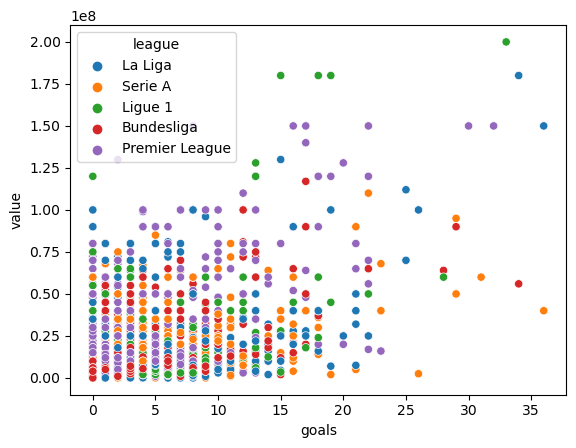

In [31]:
sns.scatterplot(data = data1, x = 'goals', y = 'value', hue = 'league')

In [33]:
mask = data1['league'] == 'Ligue 1'
mask_data = data1[mask]
mask_data.head()

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
2,Zinedine Ferhat,26,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
5,Zaydou Youssouf,20,182.0,France,Midfield,7000000,16,1077,0,0,...,17,28,8,6,14,29,45,30,No,No
10,Yusuf Yazıcı,22,183.0,Turkey,Midfield,13000000,18,848,1,4,...,4,28,15,4,9,35,27,49,No,No


In [35]:
mask_data.sort_values(by = 'value', ascending = False)

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
4003,Kylian Mbappé,19,178.0,France,Forward,200000000,29,2343,33,7,...,1,38,29,4,5,105,35,91,Yes,No
4006,Neymar,26,175.0,Brazil,Midfield,180000000,17,1439,15,7,...,1,38,29,4,5,105,35,91,Yes,No
6186,Neymar,25,175.0,Brazil,Forward,180000000,20,1797,19,13,...,1,38,29,6,3,108,29,93,Yes,No
1200,Kylian MbappĂ©,20,178.0,France,Forward,180000000,20,1513,18,5,...,1,27,22,2,3,75,24,68,Yes,No
722,Neymar,27,175.0,Brazil,Midfield,128000000,15,1318,13,6,...,1,27,22,2,3,75,24,68,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Mootaz Zemzemi,19,183.0,Tunisia,Midfield,400,1,23,0,0,...,10,27,11,5,11,32,32,38,No,No
2283,Aurélien Chedjou,34,184.0,Cameroon,Defender,325,22,1971,0,0,...,19,28,4,11,13,31,50,23,No,No
179,Timothée Nkada,20,177.0,France,Forward,300,8,148,0,0,...,6,28,10,11,7,26,21,41,No,No
1111,Lucas BuadĂ©s,21,181.0,France,Forward,300,6,121,0,0,...,18,28,7,6,15,29,44,27,No,No


In [37]:
(mask_data.groupby('nationality')['value'].mean()).sort_values(ascending = False)

nationality
Russia                    2.250000e+07
Germany                   2.150000e+07
Italy                     1.852438e+07
Argentina                 1.682692e+07
Brazil                    1.655169e+07
                              ...     
Bosnia and Herzegovina    5.004000e+05
French Guiana             3.091667e+05
Benin                     1.450000e+05
Zimbabwe                  8.000000e+04
Macedonia                 4.000000e+04
Name: value, Length: 69, dtype: float64

In [39]:
data1.isnull().sum()

player                       0
age                          0
height                       1
nationality                  0
position                     0
value                        0
games                        0
minutes                      0
goals                        0
assists                      0
crosses                      0
tackles                      0
pressures                    0
blocks                       0
touches                      0
fouls                        0
fouled                       0
offsides                     0
own goals                    0
ball recoveries              0
saves                        0
squad                        0
Season                       0
league                       0
Attendance                   0
games starts                 0
passes completed             0
sca                          0
gca                          0
dribbles completed           0
pens won                     0
goals against gk             0
shots on

In [43]:
data1_isna = data1[pd.isnull(data1.CLBestScorer)]
data1_isna.groupby("position")['CLBestScorer'].count()

position
Defender      0
Forward       0
Goalkeeper    0
Midfield      0
Name: CLBestScorer, dtype: int64

In [41]:
data1 = data1.fillna(method = "bfill")

In [43]:
data1.isnull().sum()

player                     0
age                        0
height                     0
nationality                0
position                   0
value                      0
games                      0
minutes                    0
goals                      0
assists                    0
crosses                    0
tackles                    0
pressures                  0
blocks                     0
touches                    0
fouls                      0
fouled                     0
offsides                   0
own goals                  0
ball recoveries            0
saves                      0
squad                      0
Season                     0
league                     0
Attendance                 0
games starts               0
passes completed           0
sca                        0
gca                        0
dribbles completed         0
pens won                   0
goals against gk           0
shots on target against    0
CLBestScorer               0
cards yellow  

<Axes: xlabel='value', ylabel='league'>

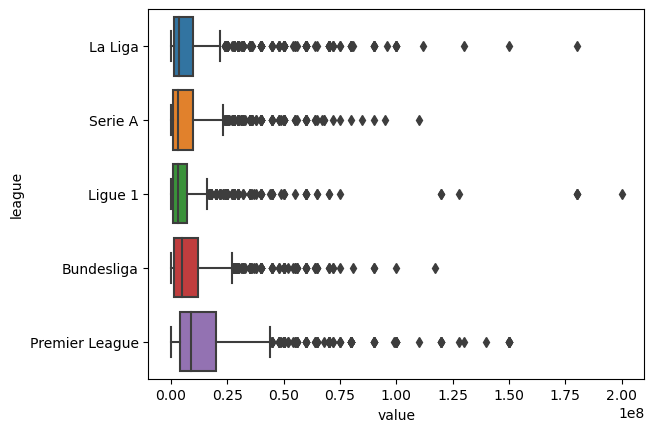

In [45]:
sns.boxplot(data = data1, x = "value", y = 'league')

<Axes: xlabel='value', ylabel='Count'>

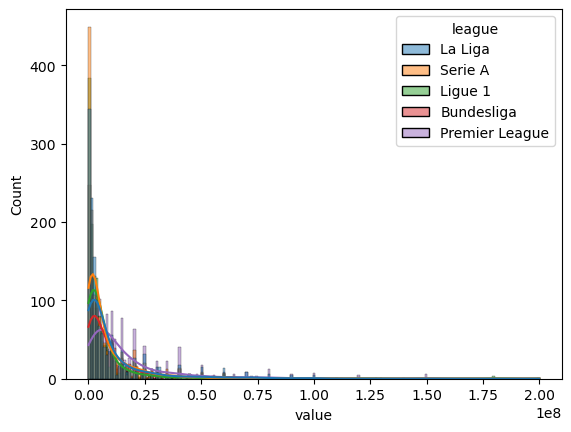

In [47]:
sns.histplot(data = data1, x = "value", kde = True, hue = "league")

As we see we need to transform our variables to start building our model.Many variables are not in the same scale, so first of all we need to choose our mainly varables for the project and then decide what variables need to be transformor

In [49]:
data1['Season'] = pd.to_datetime(data1['Season'])

In [51]:
data1.head()

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No


In [53]:
data1.dtypes

player                             object
age                                 int64
height                            float64
nationality                        object
position                           object
value                               int64
games                               int64
minutes                             int64
goals                               int64
assists                             int64
crosses                             int64
tackles                             int64
pressures                           int64
blocks                              int64
touches                             int64
fouls                               int64
fouled                              int64
offsides                            int64
own goals                           int64
ball recoveries                     int64
saves                               int64
squad                              object
Season                     datetime64[ns]
league                            

In [55]:
data1["Year season"] = (data1["Season"].dt.strftime('%Y')).astype(int)
data1["Year season"]

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
6819    2017
6820    2017
6821    2017
6822    2017
6823    2017
Name: Year season, Length: 6824, dtype: int32

In [57]:
mask = data1['Year season'] >= 2018
data1 = data1[mask]


In [59]:
Data_model = data1[['value', 'position','goals', 'assists', 'minutes', 'tackles', 'pressures', 'blocks', 'league']]

In [61]:
Data_model.head()

,value,position,goals,assists,minutes,tackles,pressures,blocks,league
0,4000000,Defender,1,2,1431,17,124,19,La Liga
1,3500000,Forward,10,5,1362,4,126,9,Serie A
2,2000000,Forward,3,4,2246,27,263,24,Ligue 1
3,15000,Midfield,0,0,59,1,24,3,Ligue 1
4,20000000,Defender,0,2,2070,65,391,37,Ligue 1


To start we should assign a number to League and position, because now they are cualitative variables, we need to transform them into a cuantitative variables to be able to use them in our model.

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder_league = LabelEncoder()
label_encoder_pos = LabelEncoder()

Data_model["COD_LEAGUE"] = label_encoder_league.fit_transform(Data_model["league"])
Data_model["COD_Position"] = label_encoder_pos.fit_transform(Data_model["position"])

C:\Users\mateo\AppData\Local\Temp\ipykernel_13496\1700215870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_model["COD_LEAGUE"] = label_encoder_league.fit_transform(Data_model["league"])
C:\Users\mateo\AppData\Local\Temp\ipykernel_13496\1700215870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_model["COD_Position"] = label_encoder_pos.fit_transform(Data_model["position"])


In [71]:
Data_model.head()

,value,position,goals,assists,minutes,tackles,pressures,blocks,league,COD_LEAGUE,COD_Position
0,4000000,Defender,1,2,1431,17,124,19,La Liga,1,0
1,3500000,Forward,10,5,1362,4,126,9,Serie A,4,1
2,2000000,Forward,3,4,2246,27,263,24,Ligue 1,2,1
3,15000,Midfield,0,0,59,1,24,3,Ligue 1,2,3
4,20000000,Defender,0,2,2070,65,391,37,Ligue 1,2,0


In [65]:
Data_model = Data_model [['value','goals','assists','minutes', 'tackles', 'pressures','COD_LEAGUE','COD_Position']]

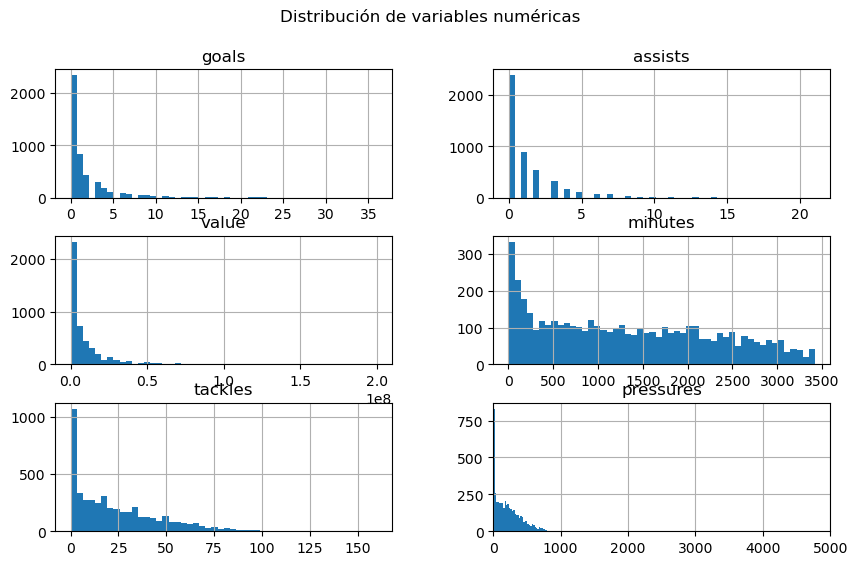

In [67]:
Data_model[['goals', 'assists', 'value', 'minutes', 'tackles', 'pressures']].hist(bins = 50, figsize=(10, 6))
plt.xlim(0,5000)
plt.suptitle("Distribución de variables numéricas")
plt.show()

It is important to decide how to manage the outliers, so it is important to identify what are the outliers to take a final decision

In [69]:
#let's calculate the limits for the different varaibles and decided how we can manage the outliers
#Goals
Per_25_g = Data_model['goals'].quantile(0.25)
Per_75_g = Data_model['goals'].quantile(0.75)
IQR = Per_75_g - Per_25_g
Upper_lim_g = Per_75_g + 1.5*IQR
Lower_lim_g = Per_25_g - 1.5*IQR
print("Limits for variable goals are: Upper Limite: ", Upper_lim_g," Lower Limit", Lower_lim_g)

#Assists 
Per_25_a = Data_model['assists'].quantile(0.25)
Per_75_a = Data_model['assists'].quantile(0.75)
IQR = Per_75_a - Per_25_a
Upper_lim_a = Per_75_a + 1.5*IQR
Lower_lim_a = Per_25_a - 1.5*IQR
print("Limits for variable assits are: Upper Limite: ", Upper_lim_a," Lower Limit", Lower_lim_a)

#Value 
Per_25_v = Data_model['value'].quantile(0.25)
Per_75_v = Data_model['value'].quantile(0.75)
IQR = Per_75_v - Per_25_v
Upper_lim_v = Per_75_v + 1.5*IQR
Lower_lim_v = Per_25_v - 1.5*IQR
print("Limits for variable value are: Upper Limite: ", Upper_lim_v," Lower Limit", Lower_lim_v)


#minutes
Per_25_m = Data_model['minutes'].quantile(0.25)
Per_75_m = Data_model['minutes'].quantile(0.75)
IQR = Per_75_m - Per_25_m
Upper_lim_m = Per_75_m + 1.5*IQR
Lower_lim_m = Per_25_m - 1.5*IQR
print("Limits for variable minutes are: Upper Limite: ", Upper_lim_m," Lower Limit", Lower_lim_m)

#tackles
Per_25_t = Data_model['tackles'].quantile(0.25)
Per_75_t = Data_model['tackles'].quantile(0.75)
IQR = Per_75_t - Per_25_t
Upper_lim_t = Per_75_t + 1.5*IQR
Lower_lim_t = Per_25_t - 1.5*IQR
print("Limits for variable tackles are: Upper Limite: ", Upper_lim_t," Lower Limit", Lower_lim_t)

#Pressures
Per_25_p = Data_model['pressures'].quantile(0.25)
Per_75_p = Data_model['pressures'].quantile(0.75)
IQR = Per_75_p - Per_25_p
Upper_lim_p = Per_75_p + 1.5*IQR
Lower_lim_p = Per_25_p - 1.5*IQR
print("Limits for variable pressures are: Upper Limite: ", Upper_lim_p," Lower Limit", Lower_lim_p)

Limits for variable goals are: Upper Limite:  5.0  Lower Limit -3.0
Limits for variable assits are: Upper Limite:  5.0  Lower Limit -3.0
Limits for variable value are: Upper Limite:  27450000.0  Lower Limit -13750000.0
Limits for variable minutes are: Upper Limite:  4558.5  Lower Limit -2005.5
Limits for variable tackles are: Upper Limite:  84.0  Lower Limit -44.0
Limits for variable pressures are: Upper Limite:  760.875  Lower Limit -378.125


Watching what the limits are, we can see that the values above of the upper limit can be normal values for a season player, so maybe it is a good idea keep this values, in the other hand, values for the lower limit seem to be very strange for player season, so maybe we want to eliminated this values. 


In [71]:
Data_model = Data_model[(Data_model['goals'] > Lower_lim_g) & (Data_model['assists'] > Lower_lim_a) & (Data_model['value'] > Lower_lim_v) & (Data_model['minutes'] > Lower_lim_m) & (Data_model['tackles'] > Lower_lim_t) & (Data_model['pressures'] > Lower_lim_p)] 


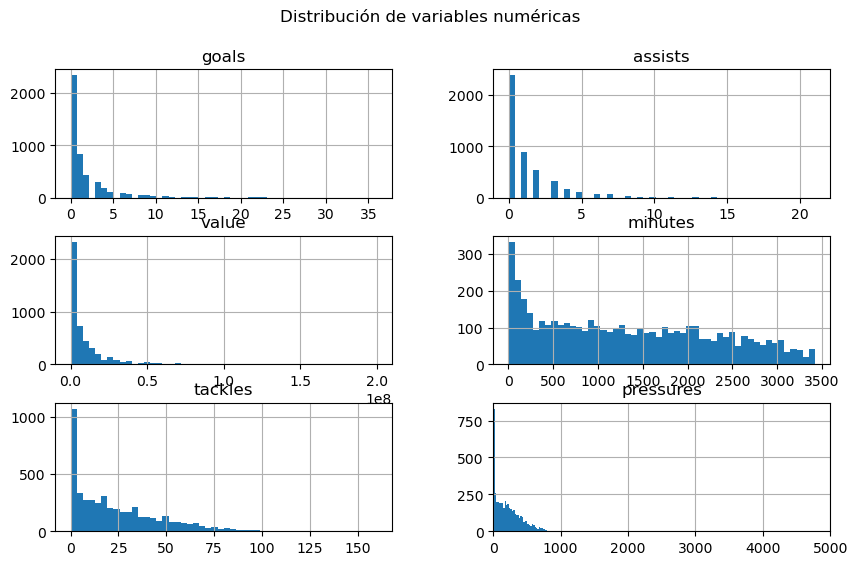

In [73]:
#Let's do again the differetn plots 

Data_model[['goals', 'assists', 'value', 'minutes', 'tackles', 'pressures']].hist(bins = 50, figsize=(10, 6))
plt.xlim(0,5000)
plt.suptitle("Distribución de variables numéricas")
plt.show()

Now we are going to apply a transformation to our variables, to scale them and also to try that this variables follow a normal distribution




In [75]:
#Import our libraries to start the process
from numpy import log
from sklearn.preprocessing import MinMaxScaler
Data_model_transformed = Data_model

#Create the scale 

scale=MinMaxScaler()
Data_model_transformed[['goals','assists', 'value','minutes','tackles', 'pressures']] = scale.fit_transform(Data_model_transformed[['goals','assists', 'value','minutes','tackles', 'pressures']])




In [77]:
Data_model_transformed

,value,goals,assists,minutes,tackles,pressures,COD_LEAGUE,COD_Position
0,0.020000,0.027778,0.095238,0.418251,0.10625,0.117424,1,0
1,0.017500,0.277778,0.238095,0.398070,0.02500,0.119318,4,1
2,0.010000,0.083333,0.190476,0.656625,0.16875,0.249053,2,1
3,0.000075,0.000000,0.000000,0.016964,0.00625,0.022727,2,3
4,0.100000,0.000000,0.095238,0.605148,0.40625,0.370265,2,0
...,...,...,...,...,...,...,...,...
4633,0.100000,0.000000,0.000000,0.973384,0.00000,0.000947,3,2
4634,0.015000,0.000000,0.000000,0.026031,0.00000,0.000000,3,2
4635,0.025000,0.055556,0.000000,0.335771,0.28125,0.214962,3,3
4636,0.075000,0.000000,0.047619,0.069903,0.00625,0.043561,3,1


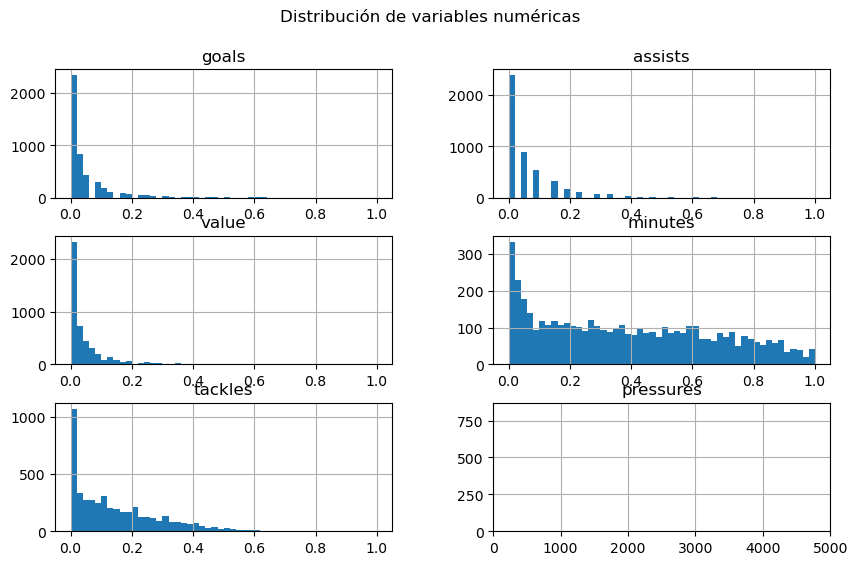

In [79]:
#Lets do again de plot 

Data_model_transformed[['goals', 'assists', 'value', 'minutes', 'tackles', 'pressures']].hist(bins = 50, figsize=(10, 6))
plt.xlim(0,5000)
plt.suptitle("Distribución de variables numéricas")
plt.show()

<Axes: xlabel='value', ylabel='goals'>

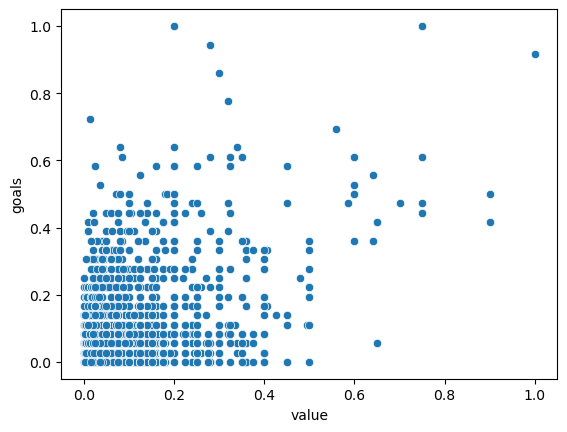

In [81]:
sns.scatterplot(data = Data_model_transformed, x = 'value', y = 'goals')

<Axes: xlabel='value', ylabel='assists'>

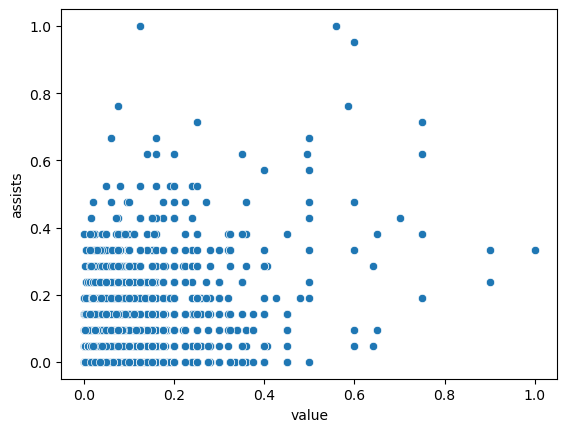

In [83]:
sns.scatterplot(data = Data_model_transformed, x = 'value', y = 'assists')

<Axes: xlabel='value', ylabel='minutes'>

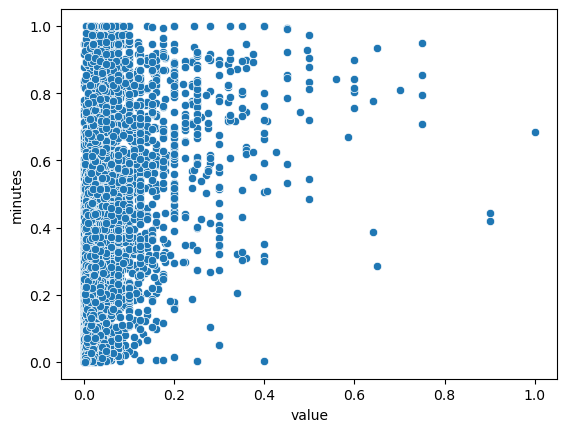

In [85]:
sns.scatterplot(data = Data_model_transformed, x = 'value', y = 'minutes')

<Axes: xlabel='value', ylabel='tackles'>

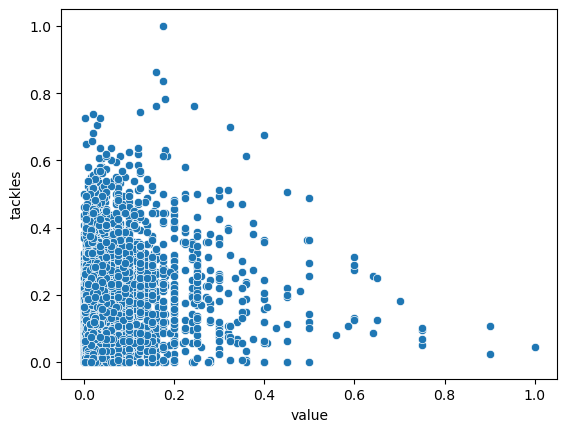

In [87]:
sns.scatterplot(data = Data_model_transformed, x = 'value', y = 'tackles')

<Axes: xlabel='value', ylabel='pressures'>

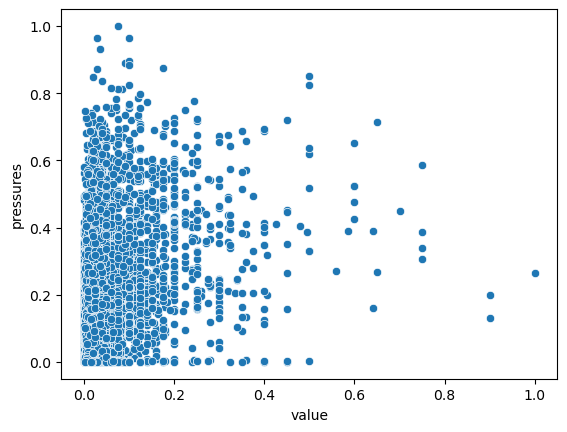

In [89]:
sns.scatterplot(data = Data_model_transformed, x = 'value', y = 'pressures')

As we see there is not a lineal correlation visible between the variables, for this case maybe can be more useful polynomic regressión

In [109]:
#Separate the data in our independent variable and dependent variable 
Y = Data_model['value']
X = Data_model[['goals','assists','minutes','tackles', 'pressures', 'COD_LEAGUE', 'COD_Position']]

In [111]:
X

,goals,assists,minutes,tackles,pressures,COD_LEAGUE,COD_Position
0,0.027778,0.095238,0.418251,0.10625,0.117424,1,0
1,0.277778,0.238095,0.398070,0.02500,0.119318,4,1
2,0.083333,0.190476,0.656625,0.16875,0.249053,2,1
3,0.000000,0.000000,0.016964,0.00625,0.022727,2,3
4,0.000000,0.095238,0.605148,0.40625,0.370265,2,0
...,...,...,...,...,...,...,...
4633,0.000000,0.000000,0.973384,0.00000,0.000947,3,2
4634,0.000000,0.000000,0.026031,0.00000,0.000000,3,2
4635,0.055556,0.000000,0.335771,0.28125,0.214962,3,3
4636,0.000000,0.047619,0.069903,0.00625,0.043561,3,1


Now the libraries to do model will be imported

In [124]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [120]:
#We are going to create the Polynomial regression model 
#First separate the data into train and test samples

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42) 
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])


Number of test samples: 928
Number of training samples: 3710


In [122]:
#Now we can creature our polynomial model

poly_feature = PolynomialFeatures(degree = 3, include_bias = False)

X_train_poly = poly_feature.fit_transform(X_train)
X_test_poly = poly_feature.transform(X_test)

In [128]:
lm = LinearRegression()
lm.fit(X_train_poly, Y_train)

LinearRegression()

In [130]:
#We can make prediccions 

predicted = lm.predict(X_train_poly)

In [134]:
#We can check r2 score on both, the train and test samples

print("R^2 on training data:", lm.score(X_train_poly, Y_train))
print("R^2 on testing data:", lm.score(X_test_poly,Y_test))

R^2 on training data: 0.4268796536250393
R^2 on testing data: 0.31108555788415826


Use GridSearch for find the best parameters 

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('scaler', StandardScaler()),('model',LinearRegression() )]
pipe=Pipeline(Input)

To search for the best combination of hyperparameters, we create a GridSearchCV object with dictionary of parameter values. 

In [146]:
param_grid = {
    "polynomial__degree": [1, 2, 3],    
}

In [148]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [152]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [154]:
search.fit(X_test, Y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable best, as follows:

In [157]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [161]:
best.score(X_test,Y_test)

0.2984669179562185

Finally, we can plot a distribution of the predicted values versus the actual values.

C:\Users\mateo\AppData\Local\Temp\ipykernel_13496\4278759458.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
C:\Users\mateo\AppData\Local\Temp\ipykernel_13496\4278759458.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

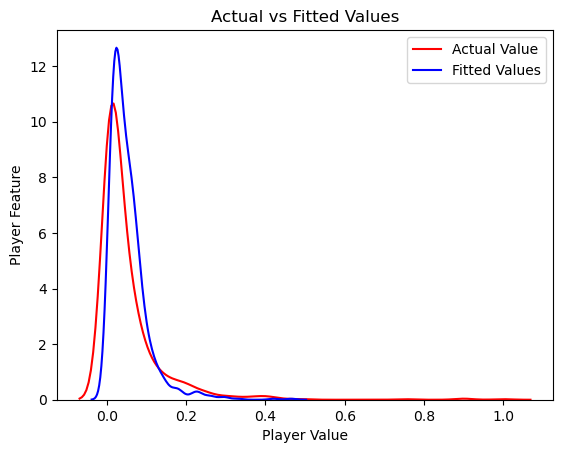

In [176]:
predicted=best.predict(X_test)
#plt_dis(Y_test,predicted)
plt.figure()
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.legend()

plt.title('Actual vs Fitted Values')
plt.xlabel('Player Value')
plt.ylabel('Player Feature')

plt.show()

goals
assists
minutes
tackles
pressures
COD_LEAGUE
COD_Position


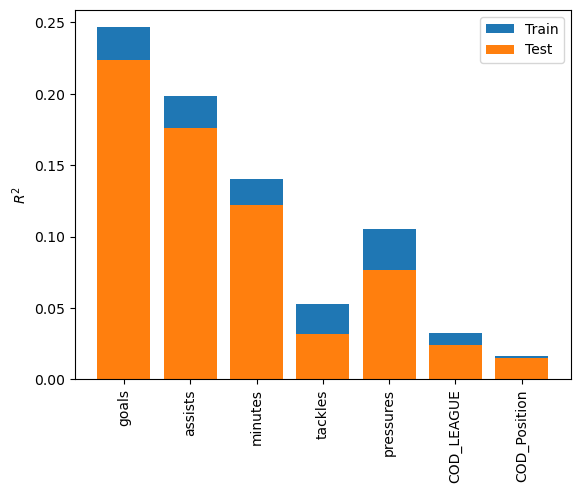

Training R^2 mean value 0.11316402644771269 Testing R^2 mean value 0.09567057444209293 
Training R^2 max value 0.24651873855807738 Testing R^2 max value 0.22387523132390397 


In [178]:
features=list(X)


R_2_train=[]
R_2_test=[]

for feature in features:
    param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__positive":[True, False]}
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    print(feature)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]], Y_test)
    best=search.best_estimator_

    R_2_test.append(best.score(X_test[[feature]],Y_test))
    R_2_train.append(best.score(X_train[[feature]],Y_train))


plt.bar(features,R_2_train,label="Train")
plt.bar(features,R_2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )